In [87]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
train = pd.read_csv('./datas/train.csv')
test = pd.read_csv('./datas/test.csv')

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

데이터를 보면 알겠지만, 결측치와 속성들이 상당히 많다. 이러한 부분은 모델을 학습시키는데 굉장히 치명적으로 작용한다.
따라서, 데이터 전처리를 해주자.

In [91]:
print(train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


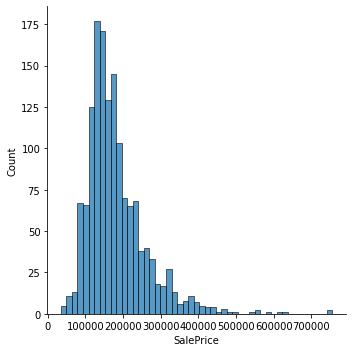

In [92]:
sns.displot(train['SalePrice'])

### 현재 데이터의 분포를 보면, 데이터가 왼쪽으로 치우쳐져 있고 첨도(데이터의 뾰족한 정도) 또한 높다는걸 알 수 있다.
### 따라서 이를 위해 Price 데이터에 log1p 를 씌워 해결합니다.

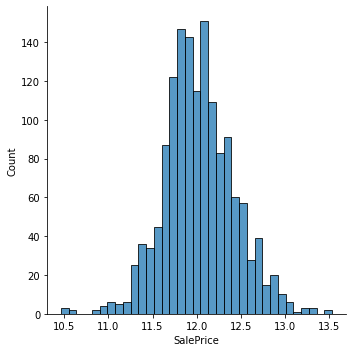

In [93]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.displot(train['SalePrice'])

### 다음은 속성값들의 상관관계를 보겠습니다. 하지만 현재 속성값이 약 80개가 존재하므로 모든 속성값을 보기엔 히트맵이 너무 크고 또한 본다 하더라도 어떤 속성값이 서로 상관관계가 있는지 알아보기에는 무리가 있습니다.

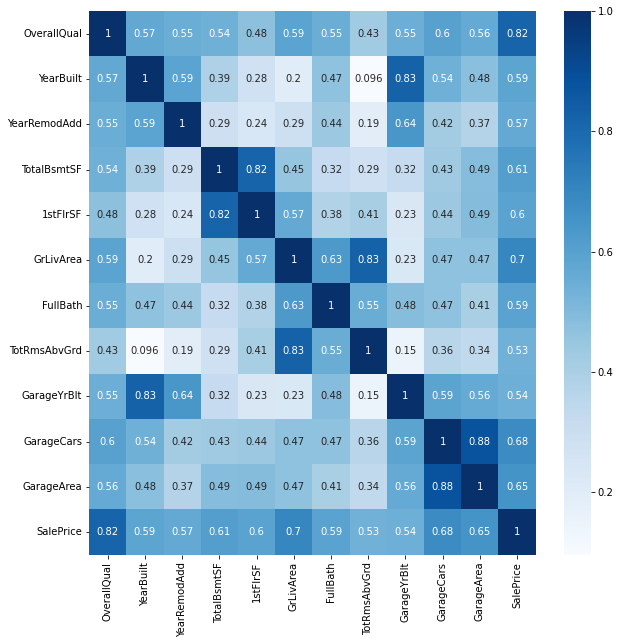

In [94]:
# 따라서, 상관관계를 나타내는 값이 0.5 보다 큰 값만을 출력하겠습니다.
import matplotlib.pyplot as plt

corr = train.corr()
highest_corr_features = corr.index[abs(corr['SalePrice']) > 0.5]
plt.figure(figsize= (10,10))
g = sns.heatmap(train[highest_corr_features].corr(), annot=True, cmap='Blues')


### 

- 히트맵의 결과 ‘OverQual’ 속성이 SalesPrice 와 상관관계가 있음을 알 수 있습니다.
- ‘TotalBsmtSF’ 속성과 ‘1stFlrSF’ 속성이 서로 굉장한 상관관계가 있음을 알 수 있습니다.
따라서 두개중 하나의 속성만을 선택하여 모델을 학습시키기로 결정하도록 합니다. ( 데이터의 속성이 너무나도 많기 때문에 줄이는 작업입니다.)
- ‘TotRmsAbvGrd’ 와 ‘GrLivArea’ 속성 또한 서로 아주 큰 상관관계가 존재하므로, 둘중 하나만을 사용하더라도 무관합니다.

### 이처럼 속성값이 많을 경우 상관관계가 큰 속성들은 지워주는것이 모델의 학습에 유리합니다.

데이터 전처리 과정에 꼭 필요한 과정중 하나는 결측치 채우기 입니다. 결측치는 모델의 학습에 큰 영향을 끼치기 때문에, 결측치를 없애주는 과정은 꼭 필요합니다.

결측치를 해결하는 방법은 여러가지가 있지만 대부분 다음과 같습니다.

- 나이, 가격 등과 같이 연속적인 데이터의 경우는 결측치를 제외한 평균값으로 채워줄 수 있습니다.
- 학점 등과 같이 A, B, C, D .. 범주형 데이터의 경우 가장 적은 속성의 값으로 채워줄 수 있습니다.
- 결측치가 너무 많은 속성의 경우 과감히 버려주는 경우도 있습니다.

 사실 이 외에도 너무나도 많은 결측치 해결 방안이 있습니다. 위에 예도 대표적 3개일뿐이지 항상 정답이 아닙니다. 따라서 데이터의 형태에 따라 적절한 방법으로 처리하는 것이 가장 중요합니다.

In [95]:
y_train = train['SalePrice']
test_id = test['Id']
all_data = pd.concat([train,test], axis=0, sort=False)
all_data = all_data.drop(['Id' , 'SalePrice'], axis=1)

결측치가 존재하는 속성에 대해 보기위해 train, test data를 합쳐 결측치의 총 양을 보겠습니다.

In [96]:
Total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum() / all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([Total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471
GarageCond,159,0.054471


결측치 확인 결과 PoolQC 속성의 경우 총 2909 개의 결측량을 발견하였고 총 개수의 99퍼센트입니다.
MiscFeature 속성의 경우는 총 2814개의 결측량을 발견하였고 그 퍼센트는 96퍼센트입니다.
이러한 결측치를 가진 속성들의 경우 그 결측치를 채워주기가 불가능에 가깝습니다. 어떠한 방법으로 결측치를 채워주든 오류가 존재할것이고 분명 결과에 큰 영향을 끼칠 것입니다.
따라서 가장 좋은 해결 방법은 결측치를 가진 속성을 지워주는 방법입니다.

또한 결측치를 가진 위의 속성들이 위헤 히트맵에서 확인하였던 SalePrice 와 큰 상관관게를 가지는 값들이 아니기에 지워주어도 괜찮다고 보여집니다.

In [97]:
# 결측치의 개수가 5개 이상인 경우 그 속성을 지워줍니다.
all_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)
print(all_data.isnull().sum().max())

4


In [98]:
object_col = all_data.dtypes=='object'
all_data.dtypes[object_col]

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

### 결측치가 존재하는 Category 형 자료는 모두 mode() 를 이용하여 채워줍니다.
### 나머지는 0으로 채워줍니다. ( 사실 좋은 방법은 아닙니다. )

In [99]:
numeric_missed = ['BsmtFinSF1',
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'TotalBsmtSF',
                  'BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageArea',
                  'GarageCars']

for feature in numeric_missed:
    all_data[feature] = all_data[feature].fillna(0)

In [100]:
categorical_missed = ['Exterior1st',
                  'Exterior2nd',
                  'SaleType',
                  'MSZoning',
                   'Electrical',
                     'KitchenQual']

for feature in categorical_missed:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])

In [101]:
all_data['Functional'] = all_data['Functional'].fillna('Typ')

In [102]:
all_data.drop(['Utilities'], axis=1, inplace=True)

In [103]:
all_data.isnull().sum().max()

0

### 결측치가 모두 사라진걸 확인할 수 있습니다.  

In [104]:
from scipy.stats import skew

numeric_data = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_data = all_data[numeric_data].apply(lambda x : skew(x)).sort_values(ascending = False)

high_skew = skewed_data[abs(skewed_data > 0.5)]
high_skew

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
dtype: float64

In [105]:
for feature in high_skew.index:
    all_data[feature] = np.log1p(all_data[feature])

In [106]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [107]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,2003,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,1976,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,2001,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,1915,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,2000,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


In [117]:
from sklearn.model_selection import train_test_split
X =all_data[:len(y_train)]
x_test = all_data[len(y_train):]

x_train , x_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, shuffle=True, random_state=100)

In [118]:
x_test.shape , x_train.shape

((292, 219), (1168, 219))

In [110]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import KFold , cross_val_score

model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, max_depth=3)
kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_train.values)
rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring ="neg_mean_squared_error",cv=kf))

In [122]:
print(rmse.mean())

0.1248352826545496


In [116]:
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05, max_depth = 3)
kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_test.values)
rmse = np.sqrt(-cross_val_score(model, x_test, y_test,scoring ="neg_mean_squared_error",cv=kf))

[12.248432 12.078435 12.258176 ... 12.486869 11.854872 11.891629]
0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64
0.0482226267254697


/Users/digang/miniforge3/envs/torch38/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
